HW4
2b
i

i.
There are a host of different methods for dealing with missing data, or data imputation techniques
A few methods, remove all the samples that have even a single feature with missing data. Obviously this technique can only
be used if the features have very few missing data points

In one method, we calculate a measure of central tendency for the feature (mean, mode, median) and replace each missing value 
with this value

We can also use linear regression to predict the missing values for the features, and then we can add gaussian normal distribution with zero mean and relevant standard deviation to add back uncertainty to the feature distribution

Performing linear regression repeatedly, in an iterative sense, over all missing features, till the feature values 'converge',
that is values between subsequent iterations are almost unchanged for each feature, is also one method (know as Expectation Maximization)

Quite a few other methods also exist, each with different levels of complexity, but these are the ones I found across multiple platforms with the highest frequency

The method used here is exactly the same as the one used in the previous portion of the assignment, that is, Linear Regression with Added Gaussian Distributions. We only use this single method.

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('aps_failure_training_set.csv')
df_test = pd.read_csv('aps_failure_test_set.csv')

print(df_train)
print(df_test)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_0

In [23]:
for i in np.arange(0,60000):
    if df_train.iloc[i,0] == 'neg':
        df_train.iloc[i,0] = 0
    else:
        df_train.iloc[i,0] = 1
        
print(df_train)
df_train.to_csv('aps_df_train.csv')

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0         0   76698     na  2130706438    280      0      0      0      0   
1         0   33058     na           0     na      0      0      0      0   
2         0   41040     na         228    100      0      0      0      0   
3         0      12      0          70     66      0     10      0      0   
4         0   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995     0  153002     na         664    186      0      0      0      0   
59996     0    2286     na  2130706538    224      0      0      0      0   
59997     0     112      0  2130706432     18      0      0      0      0   
59998     0   80292     na  2130706432    494      0      0      0      0   
59999     0   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_0

In [24]:
for j in np.arange(0,16000):
    if df_test.iloc[j,0] == 'neg':
        df_test.iloc[j,0] = 0
    else:
        df_test.iloc[j,0] = 1

print(df_test)
df_test.to_csv('aps_df_test.csv')

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0         0      60      0          20     12      0      0      0      0   
1         0      82      0          68     40      0      0      0      0   
2         0   66002      2         212    112      0      0      0      0   
3         0   59816     na        1010    936      0      0      0      0   
4         0    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995     0   81852     na  2130706432    892      0      0      0      0   
15996     0      18      0          52     46      8     26      0      0   
15997     0   79636     na        1670   1518      0      0      0      0   
15998     0     110     na          36     32      0      0      0      0   
15999     0       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 

In [25]:
df = pd.concat([df_train,df_test]).reset_index(drop=True)
print(df)
df.to_csv('aps_df_to_impute_file.csv')

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0         0   76698     na  2130706438    280      0      0      0      0   
1         0   33058     na           0     na      0      0      0      0   
2         0   41040     na         228    100      0      0      0      0   
3         0      12      0          70     66      0     10      0      0   
4         0   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995     0   81852     na  2130706432    892      0      0      0      0   
75996     0      18      0          52     46      8     26      0      0   
75997     0   79636     na        1670   1518      0      0      0      0   
75998     0     110     na          36     32      0      0      0      0   
75999     0       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 

df is the whole file which will be imputed
Total rows : 76000 indexed 0 to 75999
Total columns : 171, with headers, indexed 0 to 170, additionaly column with index 0 is the class, which has been converted into 
0's and 1's corresponding to negative and positive classes respectively

In [26]:
mis_header = []
mis_index  = []
mis_count = []
col_header = list(df.columns.values) 
tot_col = np.arange(0,171)
tot_rows = np.arange(0,76000)

i=0
for i in tot_col:
    j=0
    count = 0
    for j in tot_rows:
        if df.iloc[j,i] == 'na':
            count = count + 1
            df.iloc[j,i] = np.nan
    
    if count > 0:
        mis_header.append(col_header[i])
        mis_index.append(i)
        mis_count.append(count)


    
print(mis_header)
print(mis_index)
print(mis_count)    
print(df)

['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', '

The above set of results show that quite a few features have data that's missing, meaning that we should use a data imputation technique that predicts/fits a value in place of these missing values instead of removing those corresponding samples completely

In [27]:
df_null = df.copy()
mis_arr_pointer = np.arange(0,len(mis_index))
rows = np.arange(0,76000)
mis_arr = np.array(mis_index)
k = 0

for k in mis_arr_pointer:
    median = df.iloc[:,mis_arr[k]].astype('float64').median(axis=0,skipna=True)
    q=0
    for q in rows:
        if pd.isna(df.iloc[q,mis_arr[k]]):
            df.iloc[q,mis_arr[k]] = median

print(df_null)
print(df)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0         0   76698    NaN  2130706438    280      0      0      0      0   
1         0   33058    NaN           0    NaN      0      0      0      0   
2         0   41040    NaN         228    100      0      0      0      0   
3         0      12      0          70     66      0     10      0      0   
4         0   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995     0   81852    NaN  2130706432    892      0      0      0      0   
75996     0      18      0          52     46      8     26      0      0   
75997     0   79636    NaN        1670   1518      0      0      0      0   
75998     0     110    NaN          36     32      0      0      0      0   
75999     0       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 

Note :
All the data for regression of features is quantitative, except the class attribute column, column 0, column class, which is obviously qualitative. Thus in reality linear regression should be performed considering this class 'feature', which for imputation, will be, a feature, as a qualitative feature and modeled appropriately (to show it's qualitative behaviour, in levels, using appropriate in-built functions or by regressing over those levels). As such class has two levels, and thus we only need one 'variable' to model it, according to variables = levels - 1. Thus, it is taken care of internally, by itself. Additionally even if it have had more than two classes, we could have numerically coded it, and assumed regression over that modified feature samples for the class, or by generic replacement and ignoring the qualitative behaviour too, we could have performed regression, as for imputation this shouldn't matter much (1 of 170 features). 


Again since only two levels exist here, this point is redundant as regression is done 'correctly'

Regression is performed iteratively just like for the previous portion of the assignment. Each iteration uses updated features.

Final imputed features, without adding gaussian noise, are in df and saved to a .csv file

In [28]:
df_median = df.copy()
l=0
for l in mis_arr_pointer:
    X = df.drop(df.columns[mis_arr[l]],axis=1)
    y = df.iloc[:,mis_arr[l]]
    reg = LinearRegression().fit(X,y)
    y_pred = reg.predict(X)
    
    for j in rows:
        if pd.isna(df_null.iloc[j,mis_arr[l]]):
            df.iloc[j,mis_arr[l]] = y_pred[j]

print(df_median)
print(df)
df.to_csv('aps_df_Imputed_Data_Without_Gaussian_Error.csv')

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0         0   76698      0  2130706438    280      0      0      0      0   
1         0   33058      0           0    128      0      0      0      0   
2         0   41040      0         228    100      0      0      0      0   
3         0      12      0          70     66      0     10      0      0   
4         0   60874      0        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995     0   81852      0  2130706432    892      0      0      0      0   
75996     0      18      0          52     46      8     26      0      0   
75997     0   79636      0        1670   1518      0      0      0      0   
75998     0     110      0          36     32      0      0      0      0   
75999     0       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 

In [29]:
df_reg = df.copy()
mis_count_arr = np.array(mis_count)
e=0
for e in mis_arr_pointer:
    y = (((df_median.iloc[:,mis_arr[e]]).to_numpy()).flatten()).astype(float)
    y_pred = (((df.iloc[:,mis_arr[e]]).to_numpy()).flatten()).astype(float)
    err_sq = (y-y_pred)**2
    tot_err_sq = np.sum(err_sq)
    sd = ((tot_err_sq)/(75829))**(0.5)
    normal_dist = np.random.normal(loc=0,scale=sd,size=mis_count_arr[e])
    index_count = 0
    m=0
    for m in rows:
        if pd.isna(df_null.iloc[m,mis_arr[e]]):
            index_count = index_count + 1
            df.iloc[m,mis_arr[e]]=df.iloc[m,mis_arr[e]]+normal_dist[index_count-1]
            if df.iloc[m,mis_arr[e]] < 0:
                df.iloc[m,mis_arr[e]] = 0


print(df)

df.to_csv('aps_df_Final_Imputed_Whole.csv')

      class  aa_000     ab_000      ac_000  ad_000 ae_000 af_000 ag_000  \
0         0   76698          0  2130706438     280      0      0      0   
1         0   33058   0.645959           0  638.51      0      0      0   
2         0   41040   0.644207         228     100      0      0      0   
3         0      12          0          70      66      0     10      0   
4         0   60874  0.0356656        1368     458      0      0      0   
...     ...     ...        ...         ...     ...    ...    ...    ...   
75995     0   81852   0.709256  2130706432     892      0      0      0   
75996     0      18          0          52      46      8     26      0   
75997     0   79636  0.0635882        1670    1518      0      0      0   
75998     0     110          0          36      32      0      0      0   
75999     0       8          0           6       4      2      2      0   

      ag_001 ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  \
0          0      0  .

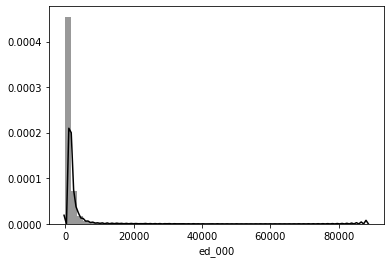

In [34]:
sns.distplot(df_null['ed_000'].dropna(),color='black')


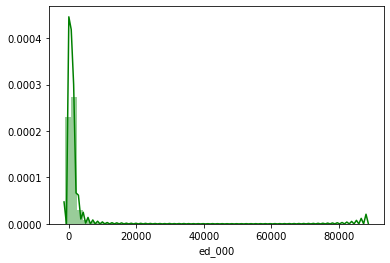

In [35]:
sns.distplot(df_reg['ed_000'],color='green')

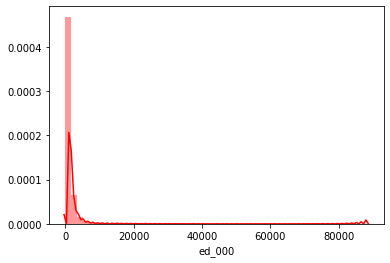

In [36]:
sns.distplot(df['ed_000'],color='red')

As can be clearly seen, the
black = actual
green = only regression
red = regression + gaussian error

The gaussian curve quite closely follows the actual curve in the original missing feature data set, plotted excluding NaN

Those features without NaN, can also be plotted, obviously their curves will be exactly identical as the imputation doesn't affect values already there

Final Comments :

Why have we used median here instead of mean?

We used mean in the first portion of the HW4, so why median here?

Mean was used initially, but the nature of the feature samples is such that they have, sometimes, weird 'jumps'. This jumpy behaviour, even at a small set of points, heavily affects the mean values

One examples of such feature was : ad_000

ad_000 has generally values in the range of 0-1500 (ballpark) and its mean lay in the range of 400-450

However one sample for ad_000 had a value that was extremely large, which raised its mean to around ~150k

This, for ad_000, happened only at a single point, all other points were bounded rather well.

Due to this jumpy behaviour using mean gave me weird imputation results, and I preferred using median that smoothed such types of jumps out.